In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

Removing columns which we think not needed for price determination

In [4]:
df1 = df.drop(['area_type', 'availability', 'society','balcony'], axis="columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

we have few rows only with na values in a data set of total 13000 rows. So dropping them

In [6]:
df1.dropna(inplace=True)
df1.shape

(13246, 5)

In [7]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [10]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [11]:
df1['total_sqft'].unique()  # For some rows we have range of sqrft, for those we take the average of it and replace

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We are calling this is_float function to check if the number can be converted to float or not, we are not converting it

In [12]:
def is_float(x):
    try:
        float(x)
    except: 
        return False
    return True

In [13]:
df1[df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
df1[~df1['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def average(x):
    tokens = x.split('-')
    if len(tokens) > 1:
        num1 = float(tokens[0])
        num2 = float(tokens[1])
        result = (num1 + num2) / 2
        # print(result)
        return result
    try:
        return float(x)  # or return x if you want to keep it as-is
    except Exception as e:
        # print(f"Error: {e}")
        return None

In [16]:
df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(average)
df2.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
average('34.36Sq.Meter')

In [18]:
df2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
df2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [20]:
df2.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [21]:
df2[df2['total_sqft'].isna()].head(20)

,location,size,total_sqft,bath,price,bhk
410,Kengeri,1 BHK,NaN,1.0,18.5,1
648,Arekere,9 Bedroom,NaN,9.0,265.0,9
775,Basavanagara,1 BHK,NaN,2.0,93.0,1
872,Singapura Village,2 BHK,NaN,2.0,45.0,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.0,1
1086,Narasapura,2 Bedroom,NaN,2.0,29.5,2
1400,Chamrajpet,9 BHK,NaN,9.0,296.0,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.0,3
1743,Hosa Road,3 BHK,NaN,3.0,115.0,3
1821,Sarjapur,3 Bedroom,NaN,3.0,76.0,3


In [22]:
df2['total_sqft'].dtype

dtype('float64')

In [23]:
df2['price'].dtype

dtype('float64')

In [24]:
df3 = df2.copy()

Feature Engineering 

Now, calculating price per sqft ratio which will be used to remove outliers

In [25]:
df3['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [26]:
len(df3.location.unique())

1304

In [27]:
df3['location'] = df3['location'].apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
Thanisandra             236
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

We cannot use hot encoding for all the location values. So, we are going to define 'others' to locations having less than equal to 10 data points

In [28]:
location_less_than_10 = location_stats[location_stats <=10]
location_less_than_10

location
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Naganathapura           10
Nagadevanahalli         10
Sector 1 HSR Layout     10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
Kamdhenu Nagar           1
Kanakadasa Layout        1
K N Extension            1
Name: location, Length: 1052, dtype: int64

In [29]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df3['location'].unique())

242

Outlier removal by business knowledge

Real estate - for each bhk we atleast need 300 sqft area

In [30]:
df3[df3['total_sqft'] / df3['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [31]:
df3.shape

(13246, 7)

In [32]:
df4 = df3[~ (df3['total_sqft'] / df3['bhk'] < 300)]
df4.shape

(12502, 7)

In [33]:
df4['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

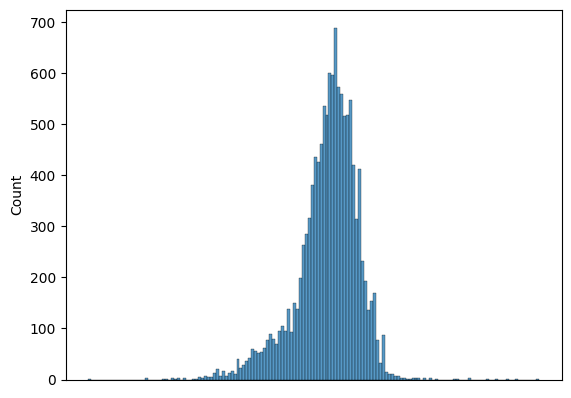

In [34]:
import seaborn as sns
sns.histplot(df4['price_per_sqft'], log_scale=0.5)  # this is a normal distribution, so we use std to find the outliers

In [35]:


def remove_outliers_and_count(df):
    
    final_df = pd.DataFrame()

    for key, subdf in df.groupby('location'):
        mean_subdf = np.mean(subdf['price_per_sqft'])
        std_subdf = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean_subdf - std_subdf)) & (subdf['price_per_sqft'] <= (mean_subdf + std_subdf))]
        final_df = pd.concat([final_df, reduced_df], ignore_index=True)

    return final_df

# Apply function
df5 = remove_outliers_and_count(df4)
df5.shape


(10241, 7)

In [36]:
df5.shape

(10241, 7)

In [37]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


We have some data points where for same location, same total_sqft, high bhk has more price than low bhk. This is a data error. So these are outliers.

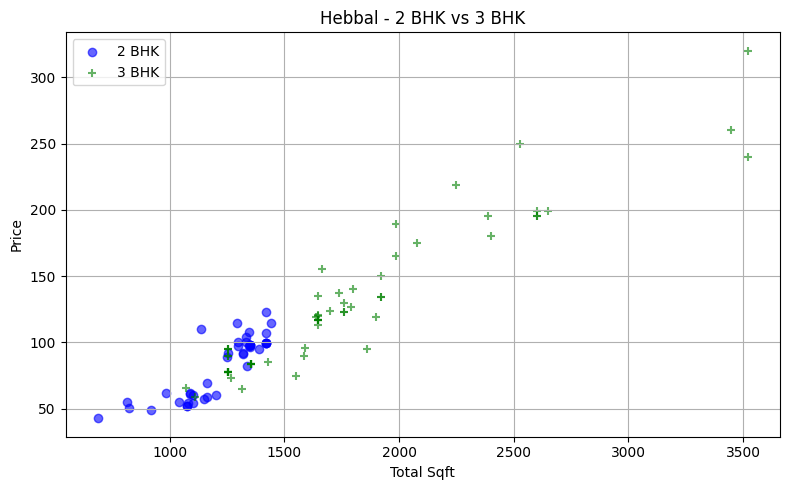

In [38]:
import matplotlib.pyplot as plt

# Filter only 2 BHK and 3 BHK
# df_bhk = df5[df5['bhk'].isin([2, 3])]

# Plot per location
# for location in df_bhk['location'].unique():

def plot_scatter_bhk(df, location):
    
    df_2bhk = df[(df['location'] == location) & (df['bhk'] == 2)]
    df_3bhk = df[(df['location'] == location) & (df['bhk'] == 3)]

    plt.figure(figsize=(8, 5))

    # Plot 2 BHK
    # df_2bhk = loc_df[loc_df['bhk'] == 2]
    plt.scatter(df_2bhk['total_sqft'], df_2bhk['price'], color='blue', label='2 BHK', alpha=0.6)

    # Plot 3 BHK
    # df_3bhk = loc_df[loc_df['bhk'] == 3]
    plt.scatter(df_3bhk['total_sqft'], df_3bhk['price'], color='green', label='3 BHK', alpha=0.6, marker='+')

    plt.title(f"{location} - 2 BHK vs 3 BHK")
    plt.xlabel("Total Sqft")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_scatter_bhk(df5, 'Hebbal')


For each group (location):

For every BHK 

check for each bhk if price_per_sqft < mean of price_per_sqft of bhk -1

if yes remove them

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    outliers_list = []

    for location, location_df in df.groupby('location'):
        bhk_stats = {}

        # Step 1: collect stats for each BHK in this location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Step 2: find outliers for current BHK based on previous BHK stats
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                # This ensures that the previous BHK group (bhk - 1) has enough data points (more than 5 rows).
                # With very few data points, the mean might be unreliable.So this acts as a minimum threshold for valid comparison.
                outliers = bhk_df[bhk_df.price_per_sqft < stats['mean']].copy()
                outliers['bhk_minus1_mean_pps'] = stats['mean']
                outliers_list.append(outliers)
                exclude_indices = np.append(exclude_indices, outliers.index.values)

    outlier_df = pd.concat(outliers_list, ignore_index=True)
    cleaned_df = df.drop(exclude_indices, axis='index')

    print(f"\n✅ Total outliers found: {len(outlier_df)}")
    return cleaned_df, outlier_df


In [40]:

df6, outlier_df = remove_bhk_outliers(df5)
outlier_df



✅ Total outliers found: 2912


,location,size,total_sqft,bath,price,bhk,price_per_sqft,bhk_minus1_mean_pps
0,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996,7931.806800
1,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522,9151.192152
2,1st Phase JP Nagar,4 BHK,4550.0,2.0,240.0,4,5274.725275,9151.192152
3,1st Phase JP Nagar,4 BHK,2615.0,5.0,222.0,4,8489.483748,9151.192152
4,5th Phase JP Nagar,3 BHK,1485.0,2.0,67.0,3,4511.784512,5067.359786
...,...,...,...,...,...,...,...,...
2907,other,8 Bedroom,3500.0,6.0,120.0,8,3428.571429,4272.049254
2908,other,8 Bedroom,2500.0,8.0,95.0,8,3800.000000,4272.049254
2909,other,9 Bedroom,4500.0,9.0,166.0,9,3688.888889,5384.347002
2910,other,9 Bedroom,3200.0,8.0,130.0,9,4062.500000,5384.347002


In [41]:
df6.shape

(7329, 7)

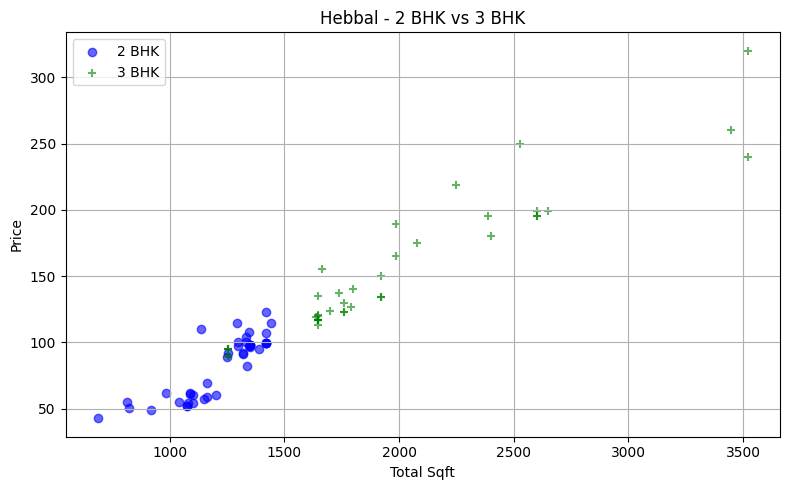

In [42]:
plot_scatter_bhk(df6, 'Hebbal')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

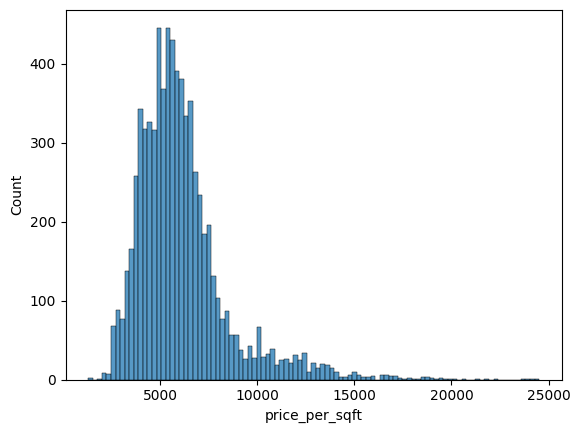

In [43]:
sns.histplot(df6['price_per_sqft'])

In [44]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
# When we have number of bathrooms +2 greater than the number of bhks, then these are outliers
df6[df6['bath'] > df6['bhk'] + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df7 = df6[df6['bath'] < df6['bhk'] + 2]
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [47]:
df8 = df7.drop(['size', 'price_per_sqft'], axis="columns") 
df8

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [48]:
dummies = pd.get_dummies(df8.location, dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df9 = pd.concat([df8, dummies.drop(['other'], axis="columns")], axis="columns")
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10 = df9.drop(['location'], axis="columns")
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = df10.drop(['price'], axis="columns")
y = df10['price']

In [52]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X.shape

(7251, 244)

In [54]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [55]:
y.shape

(7251,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, Y_train)
lin.score(X_test, Y_test)

0.845227769787438

In [58]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.86704583, 0.84112873, 0.85942374, 0.81040473, 0.79286548])

In [59]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {}
        },
        'lasso': {
            'model': Lasso(),
            'parameters': {
               'alpha': [
                1, 2
            ],
            'selection': ['cyclic', 'random']
            }  
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(test_size=0.2, n_splits=5)
    for algo_name ,config in algos.items():
        clf = GridSearchCV(config['model'], config['parameters'], cv=cv, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_Parameters': clf.best_params_,
            'best_Scores': clf.best_score_
        })
    return pd.DataFrame(scores, columns=['model', 'best_Parameters', 'best_Scores'])        
    

In [60]:
find_best_model(X, y)

,model,best_Parameters,best_Scores
0,linear_regression,{},0.849251
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.685721
2,decision_tree,"{'criterion': 'squared_error', 'splitter': 'be...",0.726327


In [61]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [62]:
def predict_price(input_data, columns):
    """
    Predict house price using a trained model.
    
    Parameters:
    - model: trained sklearn model or pipeline (e.g., LinearRegression, Ridge, etc.)
    - input_data: dict with keys like 'total_sqft', 'bath', 'bhk', 'location'
    - columns: the list of all feature columns used in training (including one-hot columns)
    
    Returns:
    - Predicted price
    """

    # Ensure columns is a list (so we can use .index())
    columns = list(columns)

    # Start with zero for all columns
    x = np.zeros(len(columns))

    # Fill numerical columns
    x[columns.index('total_sqft')] = input_data['total_sqft']
    x[columns.index('bath')] = input_data['bath']
    x[columns.index('bhk')] = input_data['bhk']

    # Fill location column (one-hot encoding)
    loc_col = input_data['location']
    if loc_col in columns:
        x[columns.index(loc_col)] = 1

    # Predict
    return model.predict([x])[0]

In [63]:
input_data = {
    'total_sqft': 1000,
    'bath': 2,
    'bhk': 2,
    'location': 'Indira Nagar'
}

# 'model' is your trained LinearRegression or Ridge model
# 'X.columns' is the column list from training dataset (including one-hot location columns)

price = predict_price(input_data, X.columns)
print(f"Predicted Price: ₹ {price:.2f} Lakhs")

Predicted Price: ₹ 181.28 Lakhs


/home/afrah/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
df8[(df8['location'] == 'Indira Nagar')]

,location,total_sqft,bath,price,bhk
3501,Indira Nagar,1200.0,2.0,93.0,2
3502,Indira Nagar,1128.0,2.0,105.0,2
3503,Indira Nagar,2800.0,3.0,330.0,3
3504,Indira Nagar,1650.0,3.0,200.0,3
3506,Indira Nagar,1210.0,2.0,102.0,2
3507,Indira Nagar,1224.0,2.0,105.0,2
3508,Indira Nagar,2070.0,3.0,225.0,3
3509,Indira Nagar,500.0,1.0,70.0,1
3510,Indira Nagar,1400.0,2.0,168.0,2
3511,Indira Nagar,2400.0,4.0,525.0,4


In [65]:
import pickle
with open('banglore_home_price_predictor.pickle', 'wb') as f:
    pickle.dump(model, f)

In [66]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))